<a href="https://colab.research.google.com/github/austinmula/ML---Classes/blob/master/ConvolutionNeuralNetworksForVision_Multi_Classification_MNIST_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intoduction
Create a CNN also known as a convnet or convolutional Neural Networks.
- Computer Vision aspplications
- Recognize handwritten digits and characters
-Recognize objects in images and videos
-Non vision applications -Natural Language Processing, Recommender systems

## Dataset
- 60, 000 labeled digital images - training data and 10,000 for testing.
- Each image is 28 by 28 pixels - 784 features represented using Numpy Arrays - grayscale pixel intensity (0-255)
- Convent - probablistic classification.
- It will tell us what is the probability of a digit being a 0,1,2,3,4,5,6,7,8,9 - The highest probability(closest to 1) is the predicted value.

In [ ]:
28 * 28

784

# Reproducibility in Keras and Deep Leaning

-Computations are done in parallel (Keras does parallel computing for floating point calcualtions)
- Can produce different results in each execution. 

## Loading the Data

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(X_train, y_train), (X_Test, y_test) = mnist.load_data()

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_train[4:10]

array([9, 2, 1, 3, 1, 4], dtype=uint8)

In [ ]:
X_train[0].shape

(28, 28)

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
X_train.shape

(60000, 28, 28)

# Visualize the Digits

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

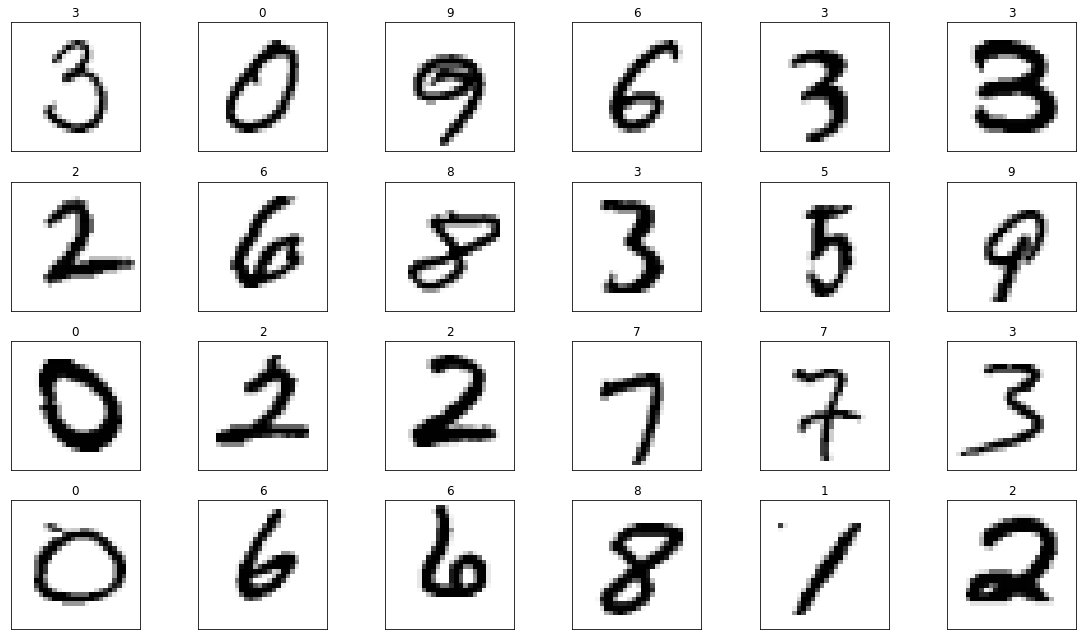

In [ ]:
index = np.random.choice(np.arange(len(X_train)), 24, replace = False) # 24 inde
figure,axes = plt.subplots(nrows = 4, ncols = 6, figsize = (16,9))

for item in zip(axes.ravel(), X_train[index], y_train[index]):
    axes, image,target = item
    axes.imshow(image, cmap = plt.cm.gray_r)
    axes.set_xticks([]) # removes the x-axis marks
    axes.set_yticks([]) # remove the y-axis marks
    axes.set_title(target)

plt.tight_layout()

# Data Preparation
- In Scikit learn, the datasets are bundled and are preprocessed into shapes that the models require
- Keras - convnet - Some preparation need to be done for data to work here - the dataset MNIST will need to be prepared
- Keras expects a Numpy array as inputs
- Each sample must have the shape
 - (width, height, channel) 
 - Each pixwl has one channel for the grayscale 0-255 the sample shades are (28,28,1)
 - Therefore the data needs to be reshaped 
-Neural Networks learn from the shapes.
- As the Neural Network learns from the images, it creates more channels.
 - The channel will represent more complex features i.e. edges, curves and lines
 -Enable the network to recognize digits based on the features and how they are combined

# Reshaping the Image Data

In [ ]:
X_train = X_train.reshape((60000, 28, 28, 1)) # (width, height, channel)

In [ ]:
X_train.shape

(60000, 28, 28, 1)

In [ ]:
X_Test = X_Test.reshape((10000, 28, 28, 1))

In [ ]:
X_Test.shape

(10000, 28, 28, 1)

In [ ]:
X_train[0, 2]
# We need to normalize the data beacuse the data ranges very widely 0 - 255..

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]], dtype=uint8)

# Normalizing the image Data
Numeric features - could varry widely 28*28 = 784. Deep learning performs better on data that is normalized
- 0.0 - 1.0
- a range for which the data mean is 0.0 and Standard Devialtion is 1.0 
 - To achieve this, Divide each pixel value by 255 to noramlize to 0.0 - 1.0 RGB(0-255): 0 ,0 , 255

In [ ]:
X_train = X_train.astype('float32')/255
# this will make the data range from 0-1
# check with X_train[0]

In [ ]:
X_Test = X_Test.astype('float32')/255

In [ ]:
y_train[2]

4

In [ ]:
X_train[2]
# This is the pixel representation of the number at position 2
# We need to convert it to an array such that all numbers are zeros except 
# the postion of that data(For y) y_train = 9 -> 000000001 
# at pos 2 y_train = 4 -> one-hot encoding becomes 000100000

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

# One-Hot Encoding: Convert Labels into categorical data.
Prediction for each digit will be an array of 10 probabilities. e.g. 0.8, 0.0, 0.1, 0, ....(10). To evaluate the model accuracy, Keras compares predictions to datasets labels
- Both must have the same shape.
- The MNIST labels are individual integers 0 - 9 We must transform labels into categorical data arrays that matches the prediction format. We use one-hot encoding to convert labels from integers into 10 element arrays of 1.0s and 0.0s Only one element is a 1.0 and the rest are 0.0s (0, 1, 2, ...9): (0, 0.05, 0.5, 0.8, 0.000) >> 0(1) 1(0) 2(0) ... 9(0) tensorflow.keras.utils function to_categorical -- one-hot encoding apples,, lemons,, oranges,,, 1 0

# One-Hot Encoding

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train = to_categorical(y_train)

In [ ]:
y_train.shape

(60000, 10)

In [ ]:
y_train[2]
# As determined above the value of y_train[2] is shown in cell 18 output
# the one-hot encoded equvallent is shown below

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
len(y_train[2])

10

In [ ]:
y_test = to_categorical(y_test)

In [ ]:
y_test.shape

(10000, 10)

# Creation of a Convolutional Neural Network
- Configure CNN
- Sequential Model - Stack layers to execute sequentially
 - Output of one layer becomes input to the next
 - Feed foward Network
 -(Not all Layers will feed the next layer)

In [ ]:
from tensorflow.keras.models import Sequential as sq

In [ ]:
cnn = sq()

In [ ]:
cnn

# Adding Layers to the network
- A typical convnet has : 
 - An input layer - receives the training samples
 - Hidden layers - that learn from the training samples
 - Output layer - produces predictions 

- We import the layers from a basic convnet

In [ ]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

# Start by Adding the Convolution layer
- This layer uses the relationship between pixels that are in close proximity so as to learn usefull features/patterns.
- The features that it learns become input for subsequet layers

- We will exmine the convolution on a 6 by 6 image.
- 3 by 3 represents the kernel
- The convolution performs calculations that run from the kernels 9 features and outputs one new feature
- Convolution diagram - 3 by 3 represent its initial position

- **Complete Pass** that goes from left to right then top to bottom is a **filter**
- if you have a 3*3 kernel, the

In [ ]:
#Adding conv2D which implements a convolutional layer (layer 1)
cnn.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))

In [ ]:
# We have 784 samples in the model, we are using 64 filters and and a kernel filter of 3*3.
# We will have 26*26*64

In [ ]:
26*26*64

43264

In [ ]:
# this increases the number of feaures significantly. This is why we will need large processing power for ML

# Overfitting
Too complex compared to what the model is modeling
Memorize the data's features
# Adding a pooling Layer
To reduce overfitting and computational time, a convolutional layer is added to reduce the dimensionality of convnet.
- It compresses (downs - sample) by discarding some features so the model can generalize well
- Max pooling is usually used. It examines 2 * 2 square features and keeps the max value.

In [ ]:
#26 * 26 * 64 geats reduced to 13*13*64

In [ ]:
cnn.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
cnn.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))

In [ ]:
cnn.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
cnn

**The input to the second convo is 131364(because of pooling) output from the first pooling layer.

Output of this Conv2D layer will be 1111128 For odd dimensions, the keras pooling layer rounds down uneven numbers i.e. (1111128) in this case 1010 -- (55 by 128) Increase filters when you pool coz <filter and <features not good**

# Flattening the Results

The model's output will be a one dimensional (1d) array of 10 probabilities that classify the digits. To prepare for a 1D final prediction, we need to flatten the previous layers to one dimension Flattens layer's output will be 1 by 3200 (55128) == 3200


In [ ]:
#Flattening the results
cnn.add(Flatten())

In [ ]:
cnn

- First layers, (before flatten) learned digit features.
- We then must learn the relationship between those features. -> to classify which digit each image represents.
- We use te fully connected Dense layers to achieve this
- We create a dense layer (128 neurons- units) that learns from 3200 outputs

In [ ]:
cnn.add(Dense(units=128, activation='relu'))

# Add Dense Layer
Convnets contain atleast one dense layer. fOR more complex image datasets with higher resoultions. Thus requires more dense layers commonly used in 4096 neurons.

We add another dense layer so as to produce the final output. The final dense layer classifies output into neurons (0-9). We use the softmax activation function that converts the 10 neurons into classification probabilities. The neuron with the highest probablilities will represent the prediction of the given input.

In [ ]:
cnn.add(Dense(units=10, activation='softmax'))

# SoftMax - Probabilities

In [ ]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               409728    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

# Visualize the Model Structure

Plot the model Function from tensorflow.keras.utila

In [ ]:
from tensorflow.keras.utils import plot_model

In [ ]:
from IPython.display import Image

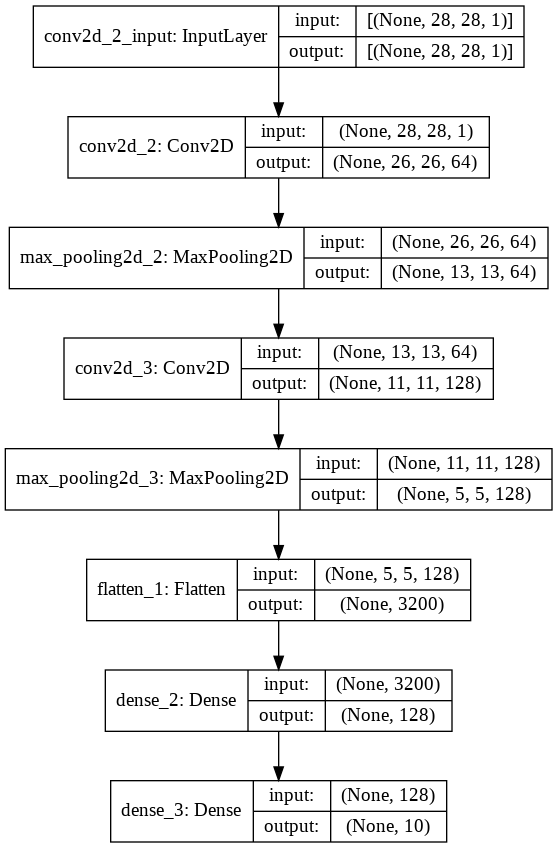

In [ ]:
plot_model(cnn, to_file='convonet.png', show_shapes=True, show_layer_names=True)
# Display the image
Image(filename='convonet.png')

In [ ]:
#Compiling the model

In [ ]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
cnn

# Training and Evaluating the Model

To train the model we need to call the fit model
- Epochs
- Hyperparameter
- Batch_size - num of samples to process, 2 - 32 t0 512
- Validation split - the model will reserve 10% for validation. It does training then validiation and testing

In [ ]:
cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 [==============================] - 111s 131ms/step - loss: 0.1400 - accuracy: 0.9570 - val_loss: 0.0430 - val_accuracy: 0.9893
Epoch 2/5
844/844 [==============================] - 110s 131ms/step - loss: 0.0420 - accuracy: 0.9868 - val_loss: 0.0349 - val_accuracy: 0.9900
Epoch 3/5
844/844 [==============================] - 110s 131ms/step - loss: 0.0283 - accuracy: 0.9910 - val_loss: 0.0293 - val_accuracy: 0.9923
Epoch 4/5
844/844 [==============================] - 110s 131ms/step - loss: 0.0196 - accuracy: 0.9940 - val_loss: 0.0327 - val_accuracy: 0.9905
Epoch 5/5
844/844 [==============================] - 111s 132ms/step - loss: 0.0141 - accuracy: 0.9955 - val_loss: 0.0447 - val_accuracy: 0.9883


In [ ]:
# Evaluating the model on unseen data(using the test dataset)
loss, accuracy = cnn.evaluate(X_Test, y_test)


313/313 [==============================] - 6s 19ms/step - loss: 0.0379 - accuracy: 0.9891


In [ ]:
loss

0.03789541497826576

In [ ]:
accuracy

0.9890999794006348

In [ ]:
# Making Predictinos with the Models predict method

predictions = cnn.predict(X_Test)

In [ ]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [ ]:
predictions[0]

array([1.0330761e-11, 1.0829675e-09, 2.1311366e-09, 3.0020271e-07,
       3.5401460e-10, 3.8900924e-10, 2.5431669e-15, 9.9999952e-01,
       5.7010824e-10, 6.2704679e-08], dtype=float32)

In [ ]:
for index, probability in enumerate(predictions[1]):
  print(f'{index}: {probability: 10%}')

0:  0.000000%
1:  0.000451%
2:  99.999547%
3:  0.000000%
4:  0.000000%
5:  0.000000%
6:  0.000001%
7:  0.000000%
8:  0.000002%
9:  0.000000%


# Locating the Incorrect predictions

- Reshape the samples(28,28,1) - keras -(28,28). Keras needed 28,28,1 ,, now we reshape it to get back to 28,28


In [ ]:
images = X_Test.reshape((10000, 28, 28))

In [ ]:
incorrect_predictions = []
# Declare a list to carry the incorrect predictions

In [ ]:
for i, (p, e) in enumerate(zip(predictions, y_test)):
  predicted, expected = np.argmax(p), np.argmax(e)

  if predicted != expected:
    incorrect_predictions.append((i, images[i], predicted, expected))

In [ ]:
len(incorrect_predictions)

109

In [ ]:
((10000-109)/ 10000) * 100
# this is the accuracy, compare to the one above

98.91

In [ ]:
# Visualizing the Incorrect predictions

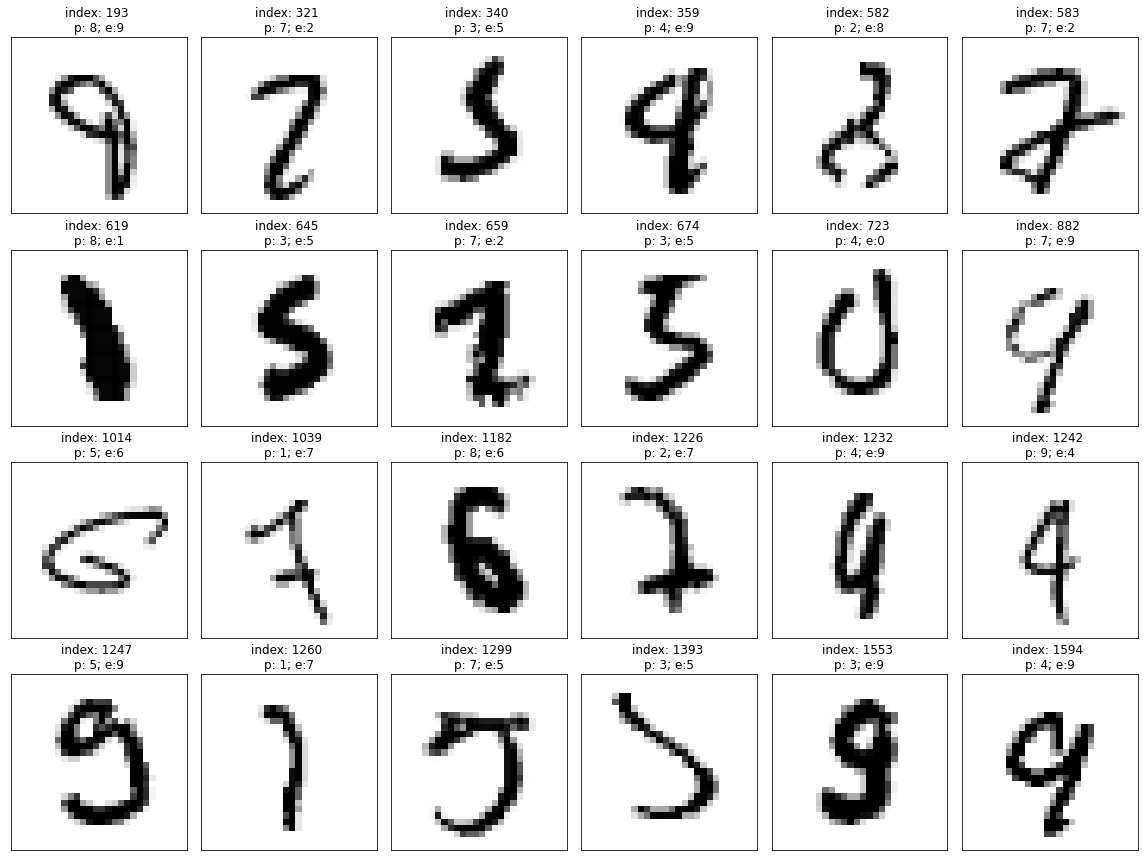

In [ ]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16,12))

for axes, item in zip(axes.ravel(), incorrect_predictions):
  index, image, predicted, expected = item
  axes.imshow(image, cmap=plt.cm.gray_r)
  axes.set_xticks([])
  axes.set_yticks([])
  axes.set_title(f'index: {index} \np: {predicted}; e:{expected}')
plt.tight_layout()

In [ ]:
def display_probabilities (prediction):
  for index, probability in enumerate(prediction):
    print(f'{index}: {probability: .10%}')

In [ ]:
display_probabilities(predictions[882])

0:  0.0003295012%
1:  0.8568720892%
2:  0.0217939218%
3:  0.0230988284%
4:  40.2954459190%
5:  0.0000924584%
6:  0.0000389304%
7:  47.1490502357%
8:  0.9549870156%
9:  10.6982953846%
